In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix




In [59]:
#Load and preprocess the SMS dataset
Data = pd.read_csv('C:\\Users\\hp\\Desktop\\SMS Spam Collection Dataset\\spam.csv', encoding='ISO-8859-1')

In [60]:
display(Data)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [61]:
#Dropping specific columns from the DataFrame Data and assigning the resulting DataFrame to a new variable Spam_data.
Spam_data=Data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'] ,axis=1)



In [62]:
display(Spam_data)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [63]:
#change the column names of the Spam_data DataFrame to 'Targets' and 'SMS'
Spam_data[['v2','v1']]
Spam_data.columns=['Targets','SMS']

In [64]:
Spam_data.head()

,Targets,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
#Display information about the dataset Spam_data.
Spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Targets  5572 non-null   object
 1   SMS      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [66]:
# Extract unique values from 'targets' column and sort them
Targets_class = sorted(Spam_data['Targets'].unique().tolist())
Targets_class


['ham', 'spam']

In [67]:
#Print the number of rows in the DataFrame Spam_data.
print("the Number of rows in the Dataframe spam_data is ",len(Spam_data))

the Number of rows in the Dataframe spam_data is  5572


In [68]:
#Calculate the number of missing values in each column of the DataFrame Spam_data
print("The Number of missing values is ",Spam_data.isnull().sum())


The Number of missing values is  Targets    0
SMS        0
dtype: int64


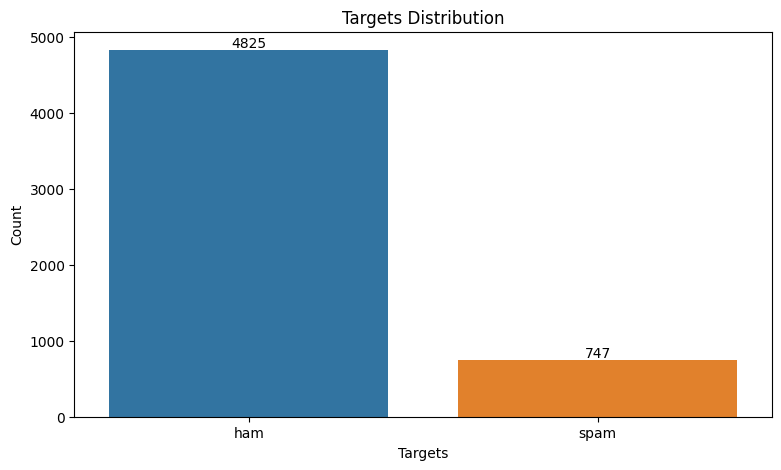

In [69]:
#the distribution of targets in the DataFrame Spam_data.
category_counts = Spam_data['Targets'].value_counts().reset_index()
category_counts.columns = ['Targets', 'Count']
plt.figure(figsize=(9, 5))
sns.barplot(x='Targets', y='Count', data=category_counts)
plt.xlabel('Targets')
plt.ylabel('Count')
plt.title('Targets Distribution')

for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [70]:
#Adding a new column called 'Target_value' to a dataframe called 'Spam_data'
Spam_data['Target_value']= Spam_data['Targets'].apply(lambda x: 1 if x=='spam' else 0)
Spam_data

,Targets,SMS,Target_value
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [71]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Spam_data.SMS, Spam_data.Target_value, test_size=0.2, random_state=42)

In [72]:
# Convert text data into a numerical representation suitable for machine learning algorithms
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)

In [73]:
X_train_count


<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [74]:
 #Create a logistic regression model

my_model = LogisticRegression()
my_model.fit(X_train_count, y_train)


LogisticRegression()

In [75]:
#convert the text data in X_test into a matrix of token counts
X_test_count = featurer.transform(X_test)
score = my_model.score(X_test_count, y_test)
print("The score of my model is {:.2f} %".format(score * 100))


The score of my model is 97.85 %


In [76]:
#Vectorization using CountVectorizer.
#Classification using LogisticRegression.
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

Pipli = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('logistic Regression ', LogisticRegression())
])


In [77]:
Pipli.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('logistic Regression ', LogisticRegression())])

In [78]:
Pipli.score(X_test,y_test)


0.97847533632287

In [79]:
# Make predictions on test data
y_pred = Pipli.predict(X_test)

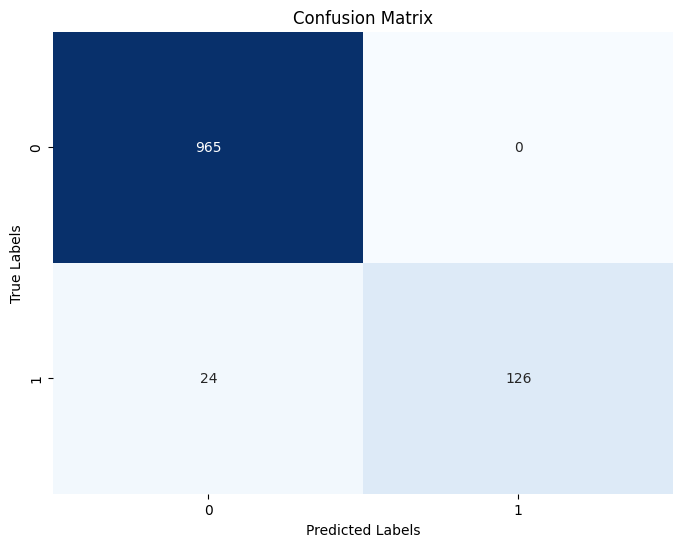

In [82]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [87]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

Accuracy: 97.85%
Precision: 97.90%
Recall: 97.85%
F1-Score: 97.77%


In [88]:
# Pre-trained model
pretrained_model = my_model 

New_SMS = [
    "Congratulations! You have won a free vacation. Click here to claim your prize.www.YouWon.com",

    "Don't miss GDG Marrakesh upcoming event: Devfest 2023",
    "Welcome to ISSUE 199 of The Overflow! This newsletter is by developers, for developers, written and curated by the Stack Overflow team and Cassidy Williams. This week: Can infrastructure-as-code be made simpler? Why are blood iron measurements different in your right and left hands? Should academic disciplines have an expiration date?"
    ,
    "Hey meryemidboucair !A sign in attempt requires further verification because we did not recognize your device. To complete the sign in, enter the verification code on the unrecognized device. " 
 
]


SMS_count  = featurer.transform(New_SMS)

# Make a prediction
predictions = pretrained_model.predict(SMS_count)
 
for sentence, prediction in zip(New_SMS, predictions):
    if prediction == 1:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")
        

'Congratulations! You have won a free vacation. Click here to claim your prize.www.YouWon.com' is a spam message.
'Don't miss GDG Marrakesh upcoming event: Devfest 2023' is not a spam message.
'Welcome to ISSUE 199 of The Overflow! This newsletter is by developers, for developers, written and curated by the Stack Overflow team and Cassidy Williams. This week: Can infrastructure-as-code be made simpler? Why are blood iron measurements different in your right and left hands? Should academic disciplines have an expiration date?' is a spam message.
'Hey meryemidboucair !A sign in attempt requires further verification because we did not recognize your device. To complete the sign in, enter the verification code on the unrecognized device. ' is not a spam message.
